# Question 1
Write the Python code for KNN classifier without using Scikit-learn library. (You are allowed 
to use the `math’ library. 

Evaluate the performance using Social_Network_Ads data set.

Compare the performance that with the Scikit-learn library.

# What is KNN Classificaction?
- K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.
- K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.
- K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.
- K-NN algorithm can be used for Regression as well as for Classification but mostly it is used for the Classification problems.
- K-NN is a non-parametric algorithm, which means it does not make any assumption on underlying data.
- It is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.
- KNN algorithm at the training phase just stores the dataset and when it gets new data, then it classifies that data into a category that is much similar to the new data.

# Using User Defined Function

In [2]:
#loading important libraries/packages for performing KNN machine learning algorithm
import numpy as np                                  #NumPy module works with the numerical data
import pandas as pd                                 #Pandas module mainly works with the tabular data
import matplotlib.pyplot as plt                     #for plotting the graphs
import seaborn as sns                               #for plotting the graphs
%matplotlib inline                                 
sns.set()
from math import *                                  #for doing math operation

In [3]:

df = pd.DataFrame(pd.read_csv("Social_Network_Ads.csv"))    #reading the csv file and converting it into dataframe
df                                                          #show the dataframe

,UserID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,Not Purchased
1,15810944,Male,35,20000,Not Purchased
2,15668575,Female,26,43000,Not Purchased
3,15603246,Female,27,57000,Not Purchased
4,15804002,Male,19,76000,Not Purchased
...,...,...,...,...,...
395,15691863,Female,46,41000,Purchased
396,15706071,Male,51,23000,Purchased
397,15654296,Female,50,20000,Purchased
398,15755018,Male,36,33000,Not Purchased


In [4]:
y=df.drop(['UserID','Gender','Age','EstimatedSalary'],axis='columns')           #creating a new df from the df dataframe only by dropping 'UserID','Gender','Age','EstimatedSalary' column
x=df.drop(['UserID','Gender','Purchased'],axis='columns')                       #creating a new df from the df1 dataframe only by dropping  'UserID','Gender','Purchased' columns


Text(0.5, 1.0, 'Age-Estimated Salary Plot using Actual Value')

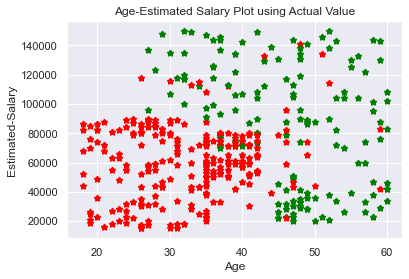

In [5]:
X=x.to_numpy()                                                                           #converting the dataframe x to numpy array X for easy modelling 
Y=y.to_numpy()                                                                           #converting the dataframe Y to numpy array Y for easy modelling
for i in range(len(X)):                                                                  #loop counter
    if Y[i] == 'Purchased':                                                              #checking if the target variable is 'purchased' or 'not purchased'
        plt.scatter(X[i][0], X[i][1], s=30, marker='*', linewidths=2, color='green' )    #generating a scatter plot with age v/s estimated salary where actual target variable is equall to 'Purchased'
    else:                                                                                #Else Condtion if target variable is 'Not-Purchased'
        plt.scatter(X[i][0], X[i][1], s=30, marker='*', linewidths=2, color='red')       #generating a scatter plot with age v/s estimated salary where actual target variable is equall to 'Not Purchased'
       
plt.plot()                                                                               #ploting
plt.xlabel('Age')                                                                        #xlabel of the plot
plt.ylabel('Estimated-Salary')                                                           #ylabel of the plot
plt.title('Age-Estimated Salary Plot using Actual Value')                                #title of the plot

In [6]:
df['Actual_purchased'] = [1 if x == "Purchased"  else  0 for x in df['Purchased']]  #converting the target variable to boolean values for performing final validation
df                                                                                  #showing the dataframe

,UserID,Gender,Age,EstimatedSalary,Purchased,Actual_purchased
0,15624510,Male,19,19000,Not Purchased,0
1,15810944,Male,35,20000,Not Purchased,0
2,15668575,Female,26,43000,Not Purchased,0
3,15603246,Female,27,57000,Not Purchased,0
4,15804002,Male,19,76000,Not Purchased,0
...,...,...,...,...,...,...
395,15691863,Female,46,41000,Purchased,1
396,15706071,Male,51,23000,Purchased,1
397,15654296,Female,50,20000,Purchased,1
398,15755018,Male,36,33000,Not Purchased,0


# Approach 1

Here we are training the KNN algorithm using the entire dataset and then we are giving custom value to algorithm to predict the what is the target variable of the above custom point. 

# Function and Logic For Checking Custom Points being added to knn Algorithm

In [7]:
dfn = df.drop(['UserID','Gender','Purchased','Actual_purchased'], axis = 1).values.tolist()        #creating a new df from the df dataframe only by dropping 'UserID','Gender','Purchased','Actual_purchased' column and converting the same to list
dft = df.drop(['UserID','Gender','Age','EstimatedSalary','Purchased'], axis = 1).values.tolist()   #creating a new df from the df dataframe only by dropping 'UserID','Gender','Age','EstimatedSalary','Purchased' column and converting the same to list

In [8]:
def euclidean_distance(a,f,k):                                    #function for finding the euclidean_distance with input parameters age,estimated salary and k value
    dist = [[0] * 1 for i in range(len(x))]                       #creating a array named dist which is having the same row size as our dataframe
    for i in range(len(x)):                                       #loop counter
        dis = (dfn[i][0]-a)**2 + (dfn[i][1]-f)**2                 #performing euclidean_distance formula on the dataframe
        dist[i] = sqrt(dis)                                       #calculating the square root of the above calculated distance
    b = np.argsort(dist)                                          #performing index sort on the distance calculated
    c = []                                                        #creating an empty list
    for i in range(k+1):                                          #loop counter
        c.append(b[i])                                            #appending the index of first k nearest neigbours
    p=0                                                           #temporary purchased variable
    for i in range(k+1):                                          #loop counter
        if(dft[c[i]]==[1]):                                       #if the target variable value at the index is equall to 1
            p+=1                                                  #updating purchased variable
    if(p>floor(k/2)):                                             #comparing p is greater than k/2  
        return 1                                                  #return one which gets mapped to purchased
    else:                                                         #else condition
        return 0                                                  #return zero which gets mapped to non purchased
    
def efficiency(dfn,k):                                            #function for calculating the predicted values using the input variables and k values
    pdt= []                                                       #declaring a manual predictor variable
    for i in range(len(dfn)):                                     #Loop counter
        r = euclidean_distance(dfn[i][0],dfn[i][1],k)             #performing euclidean_distance and save the return value of this function in pdt variable, that is zero is considered to be non-purchased and one is considered to be purchased.
        pdt.append(r)                                             #appending the 'r' value to pdt variable
    vp_pur = 0                                                    #predicted purchase value
    vn_pur = 0                                                    #predicted not-purchased value
    for i in pdt:                                                 #looping thorugh pdt value
        if(i == 1):                                               #if the counter is equall to '1'
            vp_pur+=1                                             #if the value is one, put predicted purchase value =1
        else:                                                     #else condition
            vn_pur+=1                                             #if the value is zero, put predicted not purchase value
    print('Predicted Purchased Value -', vp_pur)                  #printing the values
    print('Predicted Non-Purchased Value -', vn_pur)              #printing the values
    giv=[]                                                        #declaring the temporary given variable
    for i in range(len(dfn)):                                     #loop counter
        q = dft[i]                                                #copying values from target array to a temp variable
        giv.append(q)                                             #appending the temp variable to the 'giv' list
    vg_pur = 0                                                    #given purchased value
    vgn_pur = 0                                                   #given non purchased value
    for i in giv:                                                 #Looping thorugh giv value
        if(i == [1]):                                             #if the counter is equall to '1'
            vg_pur+=1                                             #if the value is one, put given purchase value =1
        else:                                                     #else conditon
            vgn_pur+=1                                            #if the value is zero, put given purchase value =1
    print('Given Purchased Value in dataframe -', vg_pur)         #printing the values
    print('Given Non Purchased Value in dataframe -', vgn_pur)    #printing the values
    diff = abs(int(vg_pur) -int(vp_pur))                          #calculating the difference between given value and predicted value
    total_count=len(dfn)                                          #calculting the total length of the dataframe
    eff=100-(diff/total_count)*100                                #calculating the efficiency
    print('Efficiency of the model -',eff)                                     #printing the efficiency value
    return pdt                                                    #returning the manual predicted value
    

In [9]:
def user_defined_knn(dfn,dft,Age,Estimated_Salary,k):                          #main function which executes the user defined function
    distance=euclidean_distance(Age,Estimated_Salary,k)                        #function for calling euclidean_distance
    if distance==1:                                                            #if the distance is one then print the result as purchased
        print('Purchased')                                                     #printing 'purchased'
    else:                                                                      #if the distance is zero then print the result as not purchased
        print('Not Purchased')                                                 #printing 'not purchased'
    pdt=efficiency(dfn,k)                                                      #calling function for calculating the efficiency of the model
    f_df=df.drop(['UserID','Gender','Purchased'], axis = 1)                    #creating a final dataframe by dropping 'UserID','Gender','Purchased' from original df dataframe      
    f_df['predicted_value'] = np.array(pdt)                                    #adding the predicted values(pdt) to the final dataframe
    color = ['green' if x == 1  else  'red' for x in f_df['predicted_value']]  #ploting the age vs predicted values using the 'predicted value' as a a filter
    plt.scatter(f_df['Age'],f_df['EstimatedSalary'] ,c=color ,marker='*')      #performing scatter plot
    plt.xlabel('Age')                                                          #printing xlabel
    plt.ylabel('Estimated-Salary')                                             #printing ylabel
    plt.title('Age-Estimated Salary Plot using Predicted Value')               #printing title
    


# Block For categorizing custom value using knn.

Not Purchased
Predicted Purchased Value - 153
Predicted Non-Purchased Value - 247
Given Purchased Value in dataframe - 143
Given Non Purchased Value in dataframe - 257
Efficiency of the model - 97.5


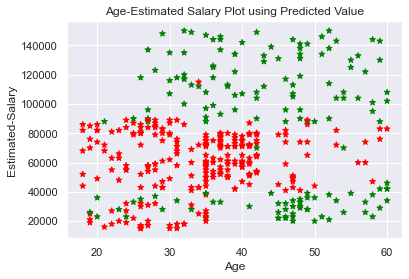

In [10]:
#variable declartion
Age = 46                                           #declaring age
Estimated_Salary=78000                             #decalring salary
k=5                                                #decalring k value
user_defined_knn(dfn,dft,Age,Estimated_Salary,k)   #calling user defined knn function


# Approach 2

Here we split the entire dataset into training and testing set and then perform the knn algorithm. This approach will uses the train and test data to provide the predicted value of the test data

# Using Train-Test Model Appraoch to predict the accuracy

In [17]:
from collections import Counter #importing 


# Shuffle your dataset 
shuffle_df = df.sample(frac=1)

Y=shuffle_df['Actual_purchased'].to_numpy()                                                                              #creating a new df from the df dataframe only by dropping 'UserID','Gender','Age','EstimatedSalary' column
X=shuffle_df.drop(['UserID','Gender','Purchased','Actual_purchased'],axis='columns').to_numpy()                          #creating a new df from the df1 dataframe only by dropping  'UserID','Gender','Purchased' columns

# Splitting the dataset into the Training set and Test set
train_pct_index = int(0.8 * len(X))                                                                              #mapping the top 320 index value to a variable 
X_train, X_test = X[:train_pct_index], X[train_pct_index:]                                                       #mapping x_train, x_test for top 80 percentage records.                                                    
y_train, y_test = Y[:train_pct_index], Y[train_pct_index:]                                                       #mapping y_train, y_test for bottom 20 percentage records
    


def predict(X_train,X_test,k):                                                                                   #function declartion for predicting data using xtrain, xtest and k values
        final_output=[]                                                                                          #decalring final output variable 
        for i in range(len(X_test)):                                                                             #loop counter
            d = []                                                                                               #declaring variables
            votes = []                                                                                           #declaring variable
            for j in range(len(X_train)):                                                                        #loop counter
                dist = sqrt((X_train[j][0]-X_test[i][0])**2 + (X_train[j][1]-X_test[i][1])**2)                   #calculating the distance between training and testing set
                d.append([dist, j])                                                                              #making the list with index
            d.sort()                                                                                             #sorting the list
            d = d[0:k]                                                                                           #taking the first 5 values from the distance list
            for d, j in d:                                                                                       #loop counter
                votes.append(y_train[j])                                                                         #appending to the list votes                                                                         
            ans = Counter(votes).most_common(1)[0][0]                                                            #prediction of the target variable which is predicted using overall status of target variable surrounding the traget variable(purchased or not purcahsed)
            final_output.append(ans)                                                                             #appending to final output
        return final_output                                                                                      #returing the final output variable                                                                                      
    
def accuracy(actual, predicted):                                                                                 #declaring function for predicting the accuracy of the model                                                                                
    correct = 0                                                                                                  #taking correct value is equall to zero                                                                                                
    for i in range(len(actual)):                                                                                 #loop counter
        if actual[i] == predicted[i]:                                                                            #if actual value is equall to predicted value
            correct += 1                                                                                         #increase the count by one
    return correct / float(len(actual)) * 100.0                                                                  #calculting the accuracy by using predicted and actual value

# Main Function for Train-Test Approach

In [18]:
k=5                                            #declaring the k value
predicted=predict(X_train,X_test,k)            #predicting the values using x_train,x_test and k value
actual=y_test                                  #declaring actual value is equall to y_test
accuracy(actual,predicted)              #predicting the accuracy of the model

85.0

# Executing KNN using Scikit-learn library

In [19]:
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')                                                  #reading the dataset
X = dataset.iloc[:, [2, 3]].values                                                               #decalring the dependant variable 
y = dataset.iloc[:, -1].values                                                                   #decalring target variable

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split                                              #importing libarary for train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 101, shuffle=True)     #splitting of data to trainig and testing

# Feature Scaling
#Feature Scaling is a technique to standardize the independent features present in the data in a fixed range.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)                                                               #feature scaling the X train data
X_test = sc.transform(X_test)                                                                     #feature scalling the X test data

# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier                                                #importing knn classifier
classifier = KNeighborsClassifier(n_neighbors =7, metric = 'minkowski', p = 2)                    #performing knn classification
classifier.fit(X_train, y_train)                                                                  #fitting the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)                                                                #predicting the model

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)                                                              #calculting the confusion matrix
ac = accuracy_score(y_test, y_pred)                                                                #calculating the accuracy

In [20]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix                #importing library for predicting classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test,y_pred))                                                        #predicting the accuracy,precision,recall,f1-score,support

               precision    recall  f1-score   support

Not Purchased       1.00      0.89      0.94        54
    Purchased       0.81      1.00      0.90        26

     accuracy                           0.93        80
    macro avg       0.91      0.94      0.92        80
 weighted avg       0.94      0.93      0.93        80

